In [79]:
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()

In [81]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [82]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [83]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
X = iris.data[:, 2:]

In [85]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [86]:
import numpy as np

In [87]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [88]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [89]:
y = iris.target

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree = DecisionTreeClassifier(max_depth=2)

In [92]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [93]:
from sklearn.tree import export_graphviz

In [94]:
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names[2:], \
    class_names=iris.target_names, rounded=True, filled=True)

In [95]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pydot

In [97]:
graph = pydot.graph_from_dot_file("iris.dot")[0]

In [98]:

iris_png = graph.create_png()

In [99]:
from IPython.core.display import Image

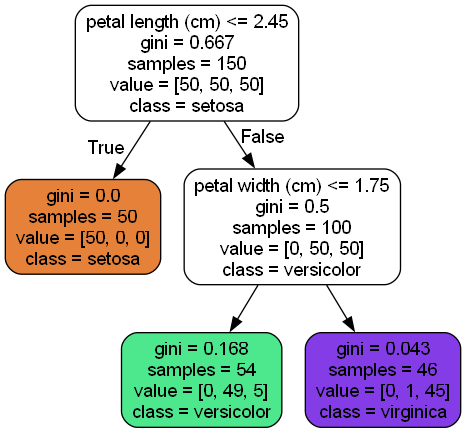

In [100]:
Image(iris_png)

In [101]:
import pandas as pd

## 1. 데이터 불러오기 및 전처리
- `train.csv`의 처음 100,000개 행을 학습 데이터로, 다음 100,000개 행을 테스트 데이터로 사용
- 불필요한 열(`id`, `hour`, `device_id`, `device_ip`)은 제거
- 범주형 피처들을 모델에 넣기 위해 `DictVectorizer`를 사용하여 희소 벡터 형태로 변환

In [102]:
train_df = pd.read_csv("train.csv", nrows=100000)

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  int64  
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  object 
 6   site_domain       100000 non-null  object 
 7   site_category     100000 non-null  object 
 8   app_id            100000 non-null  object 
 9   app_domain        100000 non-null  object 
 10  app_category      100000 non-null  object 
 11  device_id         100000 non-null  object 
 12  device_ip         100000 non-null  object 
 13  device_model      100000 non-null  object 
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

In [104]:
unused_columns, label_column = ['id', 'hour', 'device_id', 'device_ip'], "click"

In [105]:
train_df = train_df.drop(unused_columns, axis=1)

In [106]:
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())

In [107]:
X_dict_train

[{'C1': 1005,
  'banner_pos': 0,
  'site_id': '1fbe01fe',
  'site_domain': 'f3845767',
  'site_category': '28905ebd',
  'app_id': 'ecad2386',
  'app_domain': '7801e8d9',
  'app_category': '07d7df22',
  'device_model': '44956a24',
  'device_type': 1,
  'device_conn_type': 2,
  'C14': 15706,
  'C15': 320,
  'C16': 50,
  'C17': 1722,
  'C18': 0,
  'C19': 35,
  'C20': -1,
  'C21': 79},
 {'C1': 1005,
  'banner_pos': 0,
  'site_id': '1fbe01fe',
  'site_domain': 'f3845767',
  'site_category': '28905ebd',
  'app_id': 'ecad2386',
  'app_domain': '7801e8d9',
  'app_category': '07d7df22',
  'device_model': '711ee120',
  'device_type': 1,
  'device_conn_type': 0,
  'C14': 15704,
  'C15': 320,
  'C16': 50,
  'C17': 1722,
  'C18': 0,
  'C19': 35,
  'C20': 100084,
  'C21': 79},
 {'C1': 1005,
  'banner_pos': 0,
  'site_id': '1fbe01fe',
  'site_domain': 'f3845767',
  'site_category': '28905ebd',
  'app_id': 'ecad2386',
  'app_domain': '7801e8d9',
  'app_category': '07d7df22',
  'device_model': '8a4875b

In [108]:
y_train = train_df[label_column]

In [109]:
test_df = pd.read_csv('train.csv', header=0, skiprows=(1, 100000), nrows=100000)

In [110]:
test_df = test_df.drop(unused_columns, axis=1)

In [111]:
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())

In [112]:
y_test = test_df[label_column]

## 2. 범주형 데이터 벡터화
- `DictVectorizer`를 이용해 `X_dict_train`을 `X_train`으로, `X_dict_test`를 `X_test`로 변환
- **주의:** 테스트셋에도 `fit_transform()`이 사용되어 잠재적인 오류 소지가 있습니다. 실제로는 학습셋에만 `fit_transform()`, 테스트셋에는 `transform()`을 사용

In [113]:
from sklearn.feature_extraction import DictVectorizer

In [114]:
vectorizer = DictVectorizer(sparse=True)

In [115]:
X_train = vectorizer.fit_transform(X_dict_train)

In [116]:
X_train.shape

(100000, 4952)

In [117]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

- `fit_transform()`:  
  - 피처 이름(열)을 **새롭게 학습하고** 벡터로 변환함  
  - **학습 데이터(train)** 에만 사용 
  - 테스트셋에 사용하면 **훈련셋과 구조가 달라져 문제 발생 가능**

- `transform()`:
  - 이미 학습한 피처 구조를 **그대로 사용하여 변환**  
  - **테스트 데이터(test)** 에 사용해야 함  
  - 구조 불일치 없이 안전하게 벡터화 가능

In [118]:
X_test = vectorizer.transform(X_dict_test)

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
parameters = {'max_depth': [3, 10, None]}

## 3. 의사결정나무 모델 학습 및 평가
- `DecisionTreeClassifier`를 `min_samples_split=30`으로 설정하고, `GridSearchCV`를 사용해 `max_depth`를 튜닝
- 평가 지표는 `roc_auc`이며, 교차검증은 5폴드로 설정
- 최종 모델을 통해 다음을 수행:
  - 정확도 평가 (`accuracy_score`)
  - 혼동 행렬 출력 (`confusion_matrix`)
  - ROC 곡선과 AUC 점수 시각화 (`roc_curve`, `roc_auc_score`)

In [121]:
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=5, scoring="roc_auc")

In [124]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [125]:
grid_search.best_params_

{'max_depth': 10}

In [126]:
decision_tree_best = grid_search.best_estimator_

In [127]:
y_pred = decision_tree_best.predict(X_test)

In [128]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([96545,  3455]))

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test, y_pred)

0.83249

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, y_pred)

array([[81152,  1358],
       [15393,  2097]])

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve

In [135]:
y_pred_proba = decision_tree_best.predict_proba(X_test)[:,1]
y_pred_proba

array([0.20767654, 0.13114754, 0.24324324, ..., 0.11586207, 0.06559647,
       0.06559647])

In [136]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [137]:
auc = roc_auc_score(y_test, y_pred_proba)

In [138]:
from matplotlib import pyplot as plt

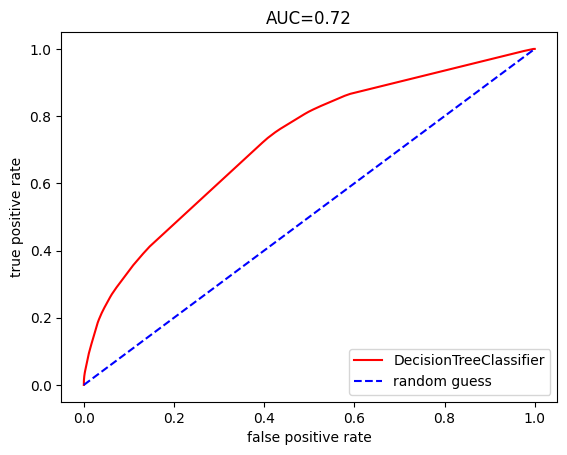

In [139]:
plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")

## 4. 랜덤 포레스트로 Iris 데이터 피처 중요도 보기
- Iris 데이터를 사용하여 `RandomForestClassifier`로 피처 중요도를 출력

In [140]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500, n_jobs=-1)
random_forest.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [141]:
for feature, importance in zip(iris.feature_names, random_forest.feature_importances_):
    print("{}: {}".format(feature, importance))

sepal length (cm): 0.10940676003030692
sepal width (cm): 0.024953798316604006
petal length (cm): 0.42165347876757187
petal width (cm): 0.4439859628855171


## 5. 랜덤 포레스트 모델 적용 및 평가
- `RandomForestClassifier(n_estimators=100, min_samples_split=30)`로 설정하고, 마찬가지로 `GridSearchCV`를 통해 `max_depth`를 탐색색
- 최적 모델(`best_estimator_`)을 얻은 후, 예측과 평가를 수행:
  - 예측값 도출 (`predict`)
  - 정확도 및 혼동 행렬 평가
  - ROC 곡선 및 AUC 시각화

# 배깅(Bagging, Bootstrap Aggregating)

## 정의
배깅은 동일한 모델을 여러 개 학습시키고 그 결과를 **평균 또는 투표로 결합하여 성능을 향상**시키는 앙상블 기법

---

## 작동 방식
1. 전체 데이터에서 **중복 허용** 무작위 샘플링 → 여러 개의 훈련 데이터셋 생성 (Bootstrap)
2. 각 훈련셋에 대해 **독립적인 모델 학습**
3. 예측 시:
   - **분류**: 다수결 투표 (Voting)
   - **회귀**: 예측값 평균 (Averaging)

---

## 목적
- **과적합(Overfitting) 완화**
- **분산(Variance) 감소**
- 개별 모델이 다르게 학습되도록 해 **안정적인 예측**을 유도

---

## 특징 요약

| 항목           | 내용 |
|----------------|------|
| 기본 아이디어  | 같은 알고리즘을 여러 번 훈련시킴 |
| 모델 다양성    | 각 모델은 다른 데이터 서브셋을 학습 |
| 병렬 처리      | 각 모델이 독립적으로 훈련되므로 병렬 처리 가능 |
| 대표 알고리즘  | `RandomForestClassifier`, `BaggingClassifier` |

---

## 예시: RandomForest
- `RandomForestClassifier`는 배깅을 기반으로 한 대표적 모델
- 기본 모델로 **결정트리**를 사용하며, 훈련 데이터와 피처를 무작위로 선택하여 다양한 트리를 생성

---

## 한 줄 요약
> 배깅은 **데이터를 무작위로 나누어 모델을 여러 개 학습시킨 후**, 그 결과를 합쳐 **예측의 안정성과 정확도를 높이는 기법**

In [142]:
random_forest = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1,criterion="gini",
    min_samples_split=30
)

### `min_samples_split=30` 의 의미와 사용 이유

#### 정의
- `min_samples_split`은 **노드를 분할(splitting)** 하기 위해 필요한 **최소 샘플 수**를 설정하는 하이퍼파라미터
- `min_samples_split=30`이면, **한 노드에 30개 이상의 샘플이 있어야 분할이 가능**합니다.

---

#### 사용 목적

| 목적             | 설명 |
|------------------|------|
| 과적합 방지     | 너무 적은 데이터로 분할되는 것을 막아 트리의 깊이가 과도하게 증가하는 것을 방지 |
| 일반화 향상     | 테스트 데이터에 대한 성능(일반화 성능)을 높이는 데 도움 |
| 계산 효율성 향상 | 불필요한 분할을 줄여 학습 속도를 높이고 트리 크기를 줄임 |

In [143]:
grid_search = GridSearchCV(
    random_forest, 
    parameters, 
    n_jobs=-1, 
    cv=3, 
    scoring="roc_auc"
)

In [144]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [145]:
grid_search.best_params_

{'max_depth': None}

In [146]:
random_forest_best =grid_search.best_estimator_

In [147]:
y_pred = random_forest_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
accuracy_score(y_test, y_pred)

0.85147

In [149]:
confusion_matrix(y_test, y_pred)

array([[81362,  1148],
       [13705,  3785]])

In [150]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:,1]
y_pred_proba

array([0.20407622, 0.13396186, 0.31379941, ..., 0.12007931, 0.17724975,
       0.04941985])

In [151]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [152]:
auc = roc_auc_score(y_test, y_pred_proba)

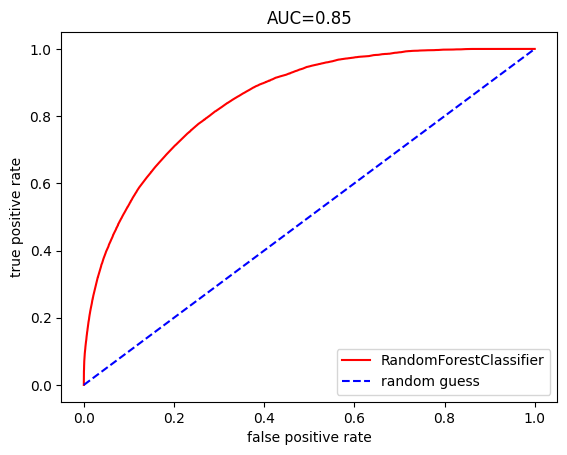

In [153]:
plt.plot(fpr, tpr, "r-", label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")

## 결론
- 랜덤 포레스트 모델이 의사결정나무에 비해 전반적으로 더 높은 AUC 점수를 측정
- ROC 곡선은 모델의 분류 성능을 직관적으로 보여주는 좋은 시각화 방법